### pred to greyscale methods

In [8]:
%load_ext autoreload
%autoreload 2
from myutils import CLIPSeg, DSS
from myutils.loaders import get_img
from myutils.processors import toGreyscale, toBinary

import matplotlib.pyplot as plt

Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


Text(0.5, 1.0, 'Histogram Comparison')

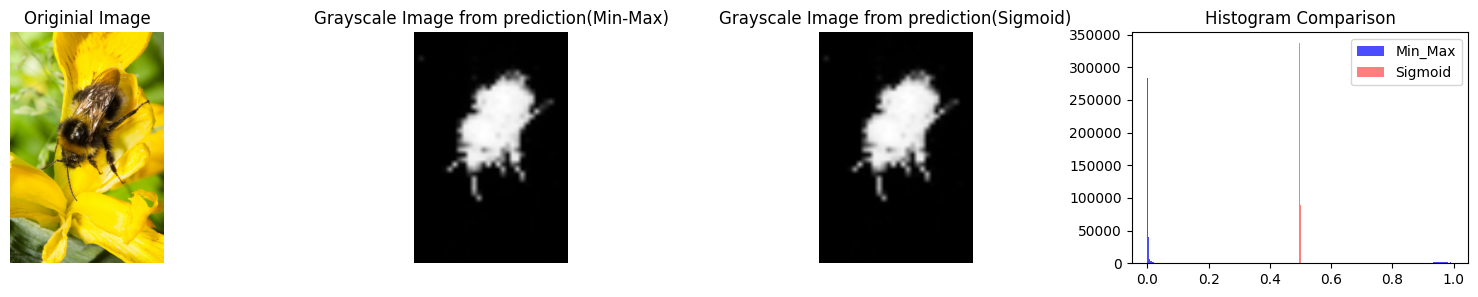

In [18]:
# First Get a prediction
img_id = 325

ori = get_img(id=img_id)
# preds = CLIPSeg.segment(ori, prompts=["bee", "background"])
preds = DSS.segment(ori)
gt = get_img(id=img_id, path="./dataset/masks/gt/")

gs_minmax = toGreyscale(preds[0], method=1)
gs_sigmoid = toGreyscale(preds[0], method=2)

# Comparision
import numpy as np
import matplotlib.pyplot as plt


bins = np.arange(256)
val_range = (0, 255)

hist1, bins1 = np.histogram(gs_minmax.flatten(), bins=256, range=[0, 1])
hist2, bins2 = np.histogram(gs_sigmoid.flatten(), bins=256, range=[0, 1])

fig, axs = plt.subplots(1, 4, figsize=(20, 3))

axs[0].imshow(ori)
axs[0].axis("off")
axs[0].set_title("Originial Image")

axs[1].imshow(gs_minmax, cmap="gray")
axs[1].axis("off")
axs[1].set_title("Grayscale Image from prediction(Min-Max)")

axs[2].imshow(gs_sigmoid, cmap="gray")
axs[2].axis("off")
axs[2].set_title("Grayscale Image from prediction(Sigmoid)")

width = bins1[1] - bins1[0]
axs[3].bar(bins1[:-1], hist1, width=width, color="blue", alpha=0.7, label="Min_Max")
axs[3].bar(bins2[:-1], hist2, width=width, color="red", alpha=0.5, label="Sigmoid")
axs[3].legend(loc="upper right")
axs[3].set_title("Histogram Comparison")

Text(0.5, 1.0, 'Histogram Comparison')

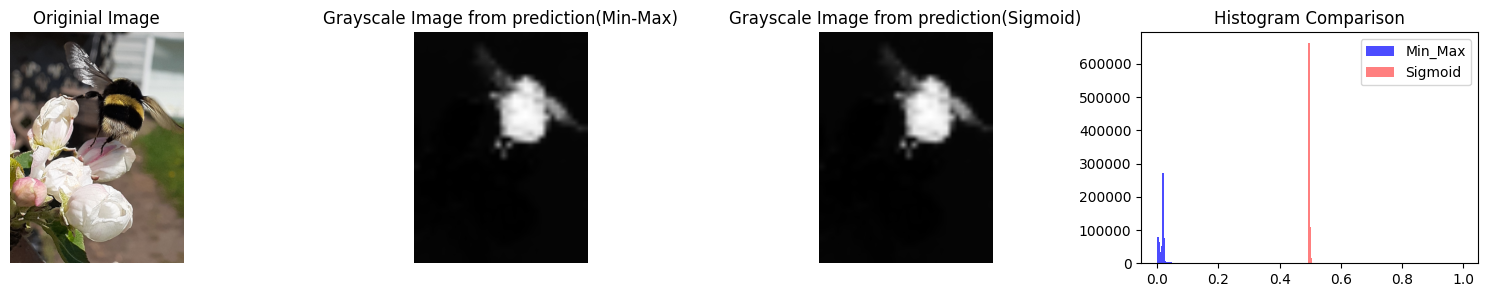

In [22]:
# First Get a prediction
img_id = 170

ori = get_img(img_id)
pred = DSS.segment(ori)
# pred = CLIPSeg.segment(ori, prompts=["bee", "background"])
gt = get_img(img_id, path="./dataset/masks/gt/")

gs_minmax = toGreyscale(pred[0], method=1)
gs_sigmoid = toGreyscale(pred[0], method=2)

# Comparision
import numpy as np
import matplotlib.pyplot as plt


bins = np.arange(256)
val_range = (0, 255)

hist1, bins1 = np.histogram(gs_minmax.flatten(), bins=256, range=[0, 1])
hist2, bins2 = np.histogram(gs_sigmoid.flatten(), bins=256, range=[0, 1])

fig, axs = plt.subplots(1, 4, figsize=(20, 3))

axs[0].imshow(ori)
axs[0].axis("off")
axs[0].set_title("Originial Image")

axs[1].imshow(gs_minmax, cmap="gray")
axs[1].axis("off")
axs[1].set_title("Grayscale Image from prediction(Min-Max)")

axs[2].imshow(gs_sigmoid, cmap="gray")
axs[2].axis("off")
axs[2].set_title("Grayscale Image from prediction(Sigmoid)")

width = bins1[1] - bins1[0]
axs[3].bar(bins1[:-1], hist1, width=width, color="blue", alpha=0.7, label="Min_Max")
axs[3].bar(bins2[:-1], hist2, width=width, color="red", alpha=0.5, label="Sigmoid")
axs[3].legend(loc="upper right")
axs[3].set_title("Histogram Comparison")

Threshold: 103.0


C:\Users\yitao\AppData\Local\Temp\ipykernel_12032\2086234765.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


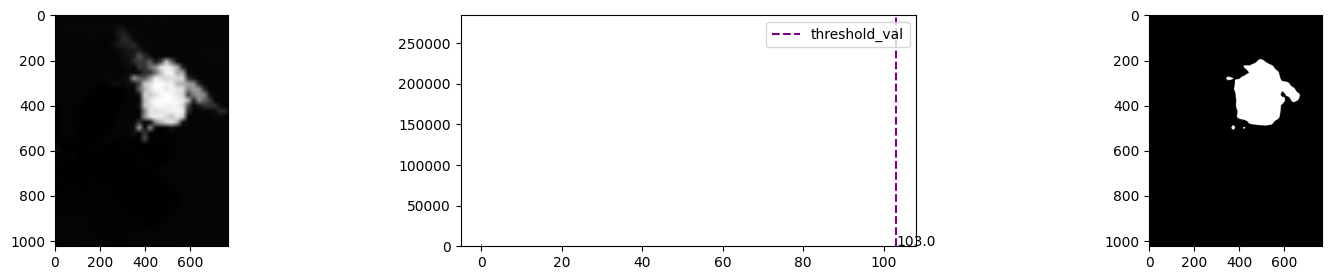

In [23]:
thr, bi_img = toBinary(gs_minmax, mode=2)

print("Threshold: {}".format(thr))

plt.subplots(figsize=(20, 3))
plt.subplot(131)
plt.imshow(gs_minmax, cmap="gray")
plt.subplot(132)
plt.axvline(x=thr, color="purple", linestyle="--", label="threshold_val")
plt.legend(loc="upper right")
plt.text(thr + 5, plt.ylim()[1] * 0.95, str(thr), color="black", ha="center")
plt.hist(gs_minmax.flatten(), bins=256, range=(0, 1))
plt.subplot(133)
plt.imshow(bi_img, cmap="gray")
plt.show()

Threshold: 127.0


C:\Users\yitao\AppData\Local\Temp\ipykernel_12032\2532201874.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


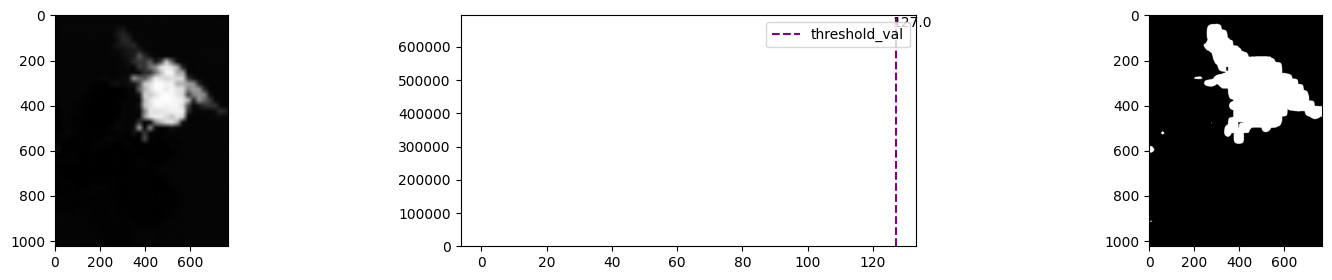

In [24]:
thr, bi_img = toBinary(gs_sigmoid, mode=2)

print("Threshold: {}".format(thr))

plt.subplots(figsize=(20, 3))
plt.subplot(131)
plt.imshow(gs_sigmoid, cmap="gray")
plt.subplot(132)
plt.hist(gs_sigmoid.flatten(), bins=256, range=(0, 1))
plt.axvline(x=thr, color="purple", linestyle="--", label="threshold_val")
plt.legend(loc="upper right")
plt.text(thr + 5, plt.ylim()[1] * 0.95, str(thr), color="black", ha="center")
plt.subplot(133)
plt.imshow(bi_img, cmap="gray")
plt.show()

### Greyscale to Binary

C:\Users\yitao\AppData\Local\Temp\ipykernel_12032\1615565071.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i + 1)


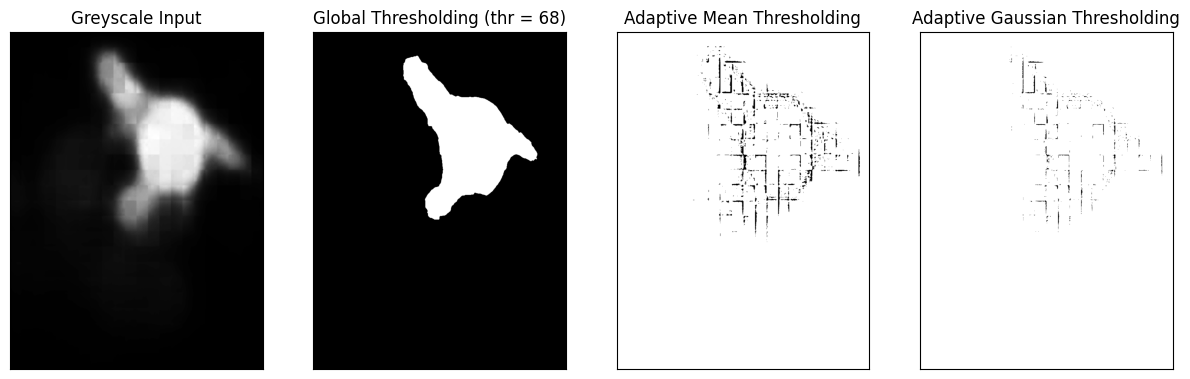

In [14]:
import cv2 as cv

gs_sigmoid_ = toGreyscale(pred[0], method=2, _gs=True)
img = gs_sigmoid_.numpy().astype(np.uint8)

img = cv.medianBlur(img, 5)
ret, th1 = cv.threshold(img, 68, 1, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
titles = [
    "Greyscale Input",
    "Global Thresholding (thr = 68)",
    "Adaptive Mean Thresholding",
    "Adaptive Gaussian Thresholding",
]
images = [img, th1, th2, th3]
plt.subplots(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

C:\Users\yitao\AppData\Local\Temp\ipykernel_9868\1790684520.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4,i+1)


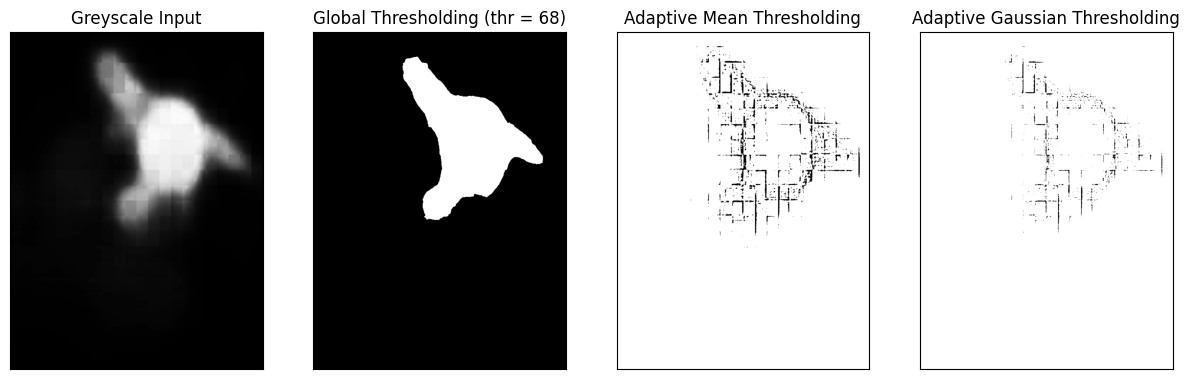

In [134]:
import cv2 as cv

img = gs_sigmoid.numpy().astype(np.uint8)

img = cv.medianBlur(img, 5)
ret, th1 = cv.threshold(img, 68, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
titles = [
    "Greyscale Input",
    "Global Thresholding (thr = 68)",
    "Adaptive Mean Thresholding",
    "Adaptive Gaussian Thresholding",
]
images = [img, th1, th2, th3]
plt.subplots(figsize=(15, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### Get Score

#### Get Best threshold for IOU

In [38]:
import numpy as np
import torch

# import torchvision.transforms as transforms
from torchmetrics.classification import BinaryJaccardIndex, BinaryAveragePrecision

# import pandas as pd
import matplotlib.pyplot as plt

from myutils import CLIPSeg, DSS
from myutils.processors import toBinary, toGreyscale, toTensor
from myutils.loaders import get_img
from myutils.score import getBestIOU

# # Load ground truth
# PREDS_PATH = "./dataset/preds/"
GT_PATH = "./dataset/masks/gt/"
# RESULTS_PATH = "./results/"

# # Torch metrics
metric_biJ = BinaryJaccardIndex()
metric_biAP = BinaryAveragePrecision()
chosen_img_id = 170
test_img = get_img(id=chosen_img_id)
preds_clipseg = CLIPSeg.segment(test_img)
preds_dss = DSS.segment(test_img)
gt = get_img(id=chosen_img_id, path=GT_PATH)

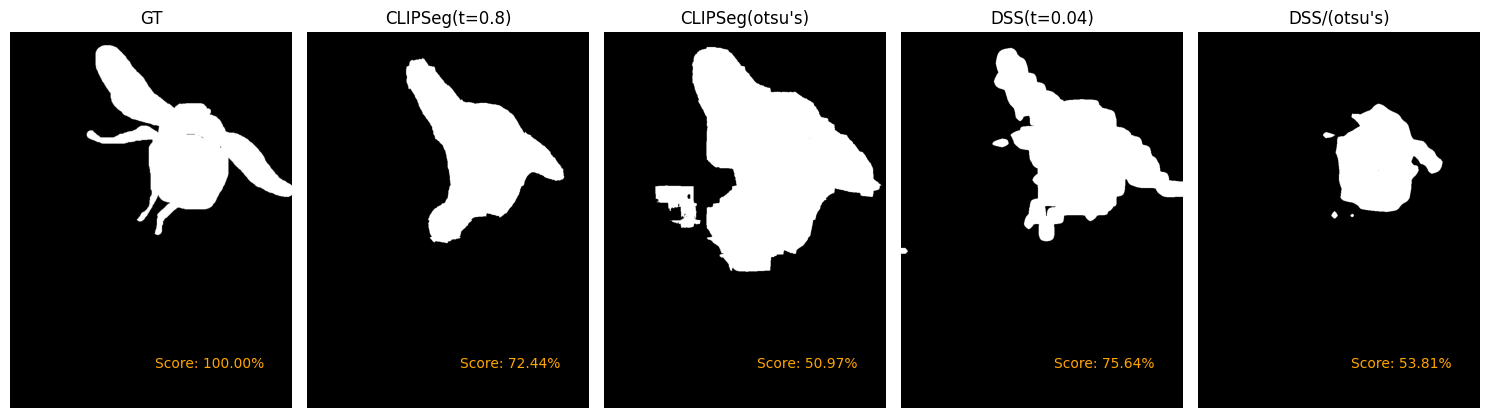

In [39]:
t_clipseg, score_clipseg = getBestIOU(preds_clipseg[0], toTensor(gt, True))
t_dss, score_dss = getBestIOU(preds_dss[0], toTensor(gt, True))
# print("Best threshold value: ", t, " with IOU score: ", score)
segmap_clipseg = toBinary(toGreyscale(preds_clipseg[0]), t_clipseg)
segmap_dss = toBinary(toGreyscale(preds_dss[0]), t_dss)

segmap_clipseg_otsu = toBinary(toGreyscale(preds_clipseg[0]), mode=2)[1]
segmap_dss_otsu = toBinary(toGreyscale(preds_dss[0]), mode=2)[1]

score_clipseg_otsu = metric_biJ(segmap_clipseg_otsu, toTensor(gt, True)).item() * 100
score_dss_otsu = metric_biJ(segmap_dss_otsu, toTensor(gt, True)).item() * 100

# Visualize the results

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

titles = ["GT", f"CLIPSeg(t={t_clipseg})", "CLIPSeg(otsu's)", f"DSS(t={t_dss})", "DSS/(otsu's)"]
scores = [100, score_clipseg, score_clipseg_otsu, score_dss, score_dss_otsu]

for i, ax in enumerate(axs):
    ax.imshow([gt, segmap_clipseg, segmap_clipseg_otsu, segmap_dss, segmap_dss_otsu][i], cmap="gray")
    ax.set_title(titles[i])
    ax.text(
        0.9,
        0.1,
        f"Score: {scores[i]:.2f}%",
        transform=ax.transAxes,
        horizontalalignment="right",
        verticalalignment="bottom",
        color="orange",
    )
    ax.axis("off")

plt.tight_layout()
plt.show()

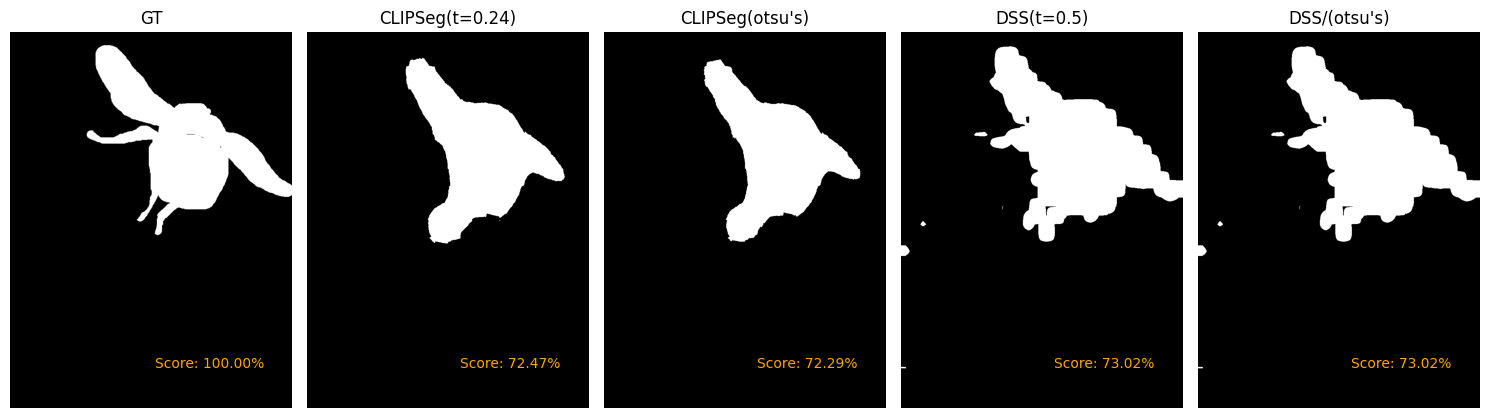

In [40]:
t_clipseg, score_clipseg = getBestIOU(preds_clipseg[0], toTensor(gt, True), 2)
t_dss, score_dss = getBestIOU(preds_dss[0], toTensor(gt, True), 2)
# print("Best threshold value: ", t, " with IOU score: ", score)
segmap_clipseg = toBinary(toGreyscale(preds_clipseg[0], 2), t_clipseg)
segmap_dss = toBinary(toGreyscale(preds_dss[0], 2), t_dss)

segmap_clipseg_otsu = toBinary(toGreyscale(preds_clipseg[0], 2), mode=2)[1]
segmap_dss_otsu = toBinary(toGreyscale(preds_dss[0], 2), mode=2)[1]

score_clipseg_otsu = metric_biJ(segmap_clipseg_otsu, toTensor(gt, True)).item() * 100
score_dss_otsu = metric_biJ(segmap_dss_otsu, toTensor(gt, True)).item() * 100

# Visualize the results

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

titles = ["GT", f"CLIPSeg(t={t_clipseg})", "CLIPSeg(otsu's)", f"DSS(t={t_dss})", "DSS/(otsu's)"]
scores = [100, score_clipseg, score_clipseg_otsu, score_dss, score_dss_otsu]

for i, ax in enumerate(axs):
    ax.imshow([gt, segmap_clipseg, segmap_clipseg_otsu, segmap_dss, segmap_dss_otsu][i], cmap="gray")
    ax.set_title(titles[i])
    ax.text(
        0.9,
        0.1,
        f"Score: {scores[i]:.2f}%",
        transform=ax.transAxes,
        horizontalalignment="right",
        verticalalignment="bottom",
        color="orange",
    )
    ax.axis("off")

plt.tight_layout()
plt.show()

In [43]:
score, t = getBestIOU(preds_clipseg[0], toTensor(gt, True))

print(f"Best threshold value: {t}, with IOU score: {score}")
# print("Best threshold value: ", t, " with IOU score: ", score)

Best threshold value: 72.4391758441925, with IOU score: 0.8


### get best prediction prompt

In [44]:
from myutils.processors import toBinary, toGreyscale
from myutils.DSS import segment
from myutils.loaders import get_img
import matplotlib.pyplot as plt
import torch
from torchmetrics.classification import BinaryJaccardIndex
import numpy as np


metric_biJ = BinaryJaccardIndex()

gt = torch.from_numpy(np.array(get_img(id=200, path="./dataset/masks/gt/").convert("1"))).long()
preds = segment(get_img(200))

In [5]:
from myutils.score import getBestIOU, getBestIOUfromPreds, getMeanIOU, getBestIOUfromPreds

# preds = segment(get_img_by_id(100, "./dataset/WildBees/"))

result = getBestIOU(id=324, pred_id=1)

print(result)

(0.36, 74.62316751480103)


In [46]:
from myutils.DSS import segment
from myutils.loaders import get_img
from myutils.processors import toGreyscale, toBinary

pred = get_img(200, path="./dataset/preds/clipseg/0/", format="pt")
pred_gs = toGreyscale(pred)
pred_bi = toBinary(pred_gs)

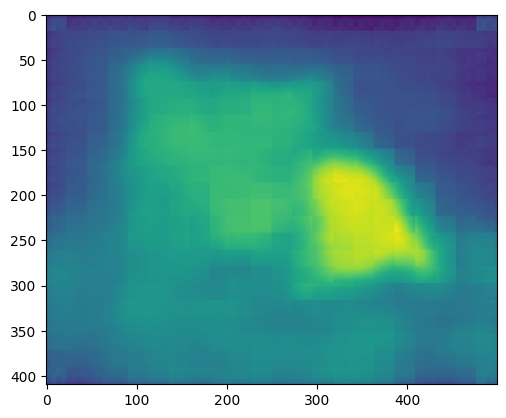

In [50]:
import matplotlib.pyplot as plt

plt.imshow(pred)

In [61]:
from myutils.DSS import segment
from myutils.loaders import get_img

preds = segment(get_img(200))
gt = torch.from_numpy(np.array(get_img(id=200, path="./dataset/masks/gt/").convert("1"))).long()

result = getBestIOUfromPreds(preds, gt)

print(f"Best prompt's idx={result[0]}, with threshold={result[1][0]}, iou score={result[1][1]:.2f}%")

Best prompt's idx=0, with threshold=0.22, iou score=78.64%


#### Get Mean IOU

In [2]:
from myutils.score import getMeanIOU

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


In [3]:
miou, duration = getMeanIOU(model=2, t=0.36)

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:10<05:18,  2.22it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [07:28<00:00,  1.62it/s]

MIOU=71.35573110607973, takes 448.37192487716675s in total, 0.6175921830264005s per image.


In [3]:
getMeanIOU(model=2)

c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


66.42354950075939

#### Get Best Mean IOU

In [3]:
from myutils.score import getBestMeanIOU, getMeanIOU

In [1]:
# DSS, min-max scaling, Global thresholding, eigenvector 0

thr, score = getBestMeanIOU(model=2)
print(f"Best threshold={thr} with score={score:.2f}%.")

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:18<13:04,  1.11s/it]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [15:18<00:00,  1.26s/it]

Best threshold=0.24 with score=72.71%.


In [6]:
# DSS, sigmoid, Global thresholding, eigenvector 0

thr, score = getBestMeanIOU(model=2, gs_mode=2)
print(f"Best threshold={thr} with score={score:.2f}%.")

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [14:13<00:00,  1.17s/it]

Best threshold=0.5 with score=52.60%.


In [4]:
# DSS, min-max scaling, Otsu's thresholding, eigenvector 0

score, _ = getMeanIOU(model=2, bi_mode=2)
print(f"Otsu's threshold with score={score:.2f}%.")

Calculating Mean IOU...:   2%|▉                                    | 18/726 [00:15<05:39,  2.09it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [06:24<00:00,  1.89it/s]

MIOU=70.53%, takes 384.01s in total, 0.53s per image.
Otsu's threshold with score=70.53%.


In [5]:
# DSS, sigmoid, Otsu's thresholding, eigenvector 0

score, _ = getMeanIOU(model=2, gs_mode=2, bi_mode=2)
print(f"Otsu's threshold with score={score:.2f}%.")

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:34<00:00,  2.17it/s]

MIOU=53.05%, takes 334.58s in total, 0.46s per image.
Otsu's threshold with score=53.05%.


#### Save DSS's scores to csv 

In [1]:
from myutils.score import saveCSV


saveCSV("DSS", 0.24)

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


Saving iou scores to file...:   2%|▊                               | 18/726 [00:10<05:16,  2.24it/s]c:\Users\yitao\.conda\envs\test\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:939: LinAlgWarning: Diagonal number 1344 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
Saving iou scores to file...: 100%|███████████████████████████████| 726/726 [07:52<00:00,  1.54it/s]


### DSS find best eigenvector

first get the best result from each list of eigenvectors

down sampling first!
calculate the similarity between the best eigenvectors 

#### Calculate similarity 



#### Clustering(Visulization) 

In [1]:
from myutils.score import getBestMeanIOUfromPreds

result = getBestMeanIOUfromPreds(prompts=["insect shaped", "bee"])

print(f"Idx of the prompt with best mIOU ={result[0]}, with threshold={result[1][0]}, iou score={result[1][1]:.2f}%")

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [05:43<00:00,  2.11it/s]

Idx of the prompt with best mIOU =0, with threshold=0.78, iou score=72.77%


In [2]:
from myutils.score import getBestMeanIOUfromPreds

result = getBestMeanIOUfromPreds(prompts=["insect shaped", "bee"])

print(f"Idx of the prompt with best mIOU ={result[0]}, with threshold={result[1][0]}, iou score={result[1][1]:.2f}%")

Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [09:29<00:00,  1.27it/s]

Idx of the prompt with best mIOU =0, with threshold=0.78, iou score=72.77%


In [1]:
from myutils.score import getBestMeanIOUfromPreds

result = getBestMeanIOUfromPreds(prompts=["placeholder", "insect shaped", "bee"])

print(f"Idx of the prompt with best mIOU ={result[0]}, with threshold={result[1][0]}, iou score={result[1][1]:.2f}%")

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.


Calculating Mean IOU...: 100%|████████████████████████████████████| 726/726 [14:20<00:00,  1.19s/it]

Idx of the prompt with best mIOU =1, with threshold=0.78, iou score=72.77%


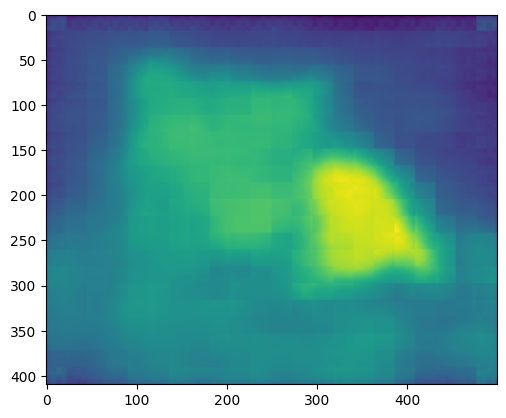

In [1]:
from myutils.CLIPSeg import get_segment
from myutils.loaders import get_img_by_id
import matplotlib.pyplot as plt


_, segment = get_segment(["insect shaped", "bee"])
test_img = get_img_by_id(200)
preds = segment(test_img)

plt.imshow(preds[1])

In [3]:
length, newsegment = get_segment(["insect shaped", "bee"])
print(f"length of the preds: {length}, returned function: {newsegment}")

length of the preds: 2, returned function: <function get_segment.<locals>._segment at 0x000002969F4FBCE0>


### DSS -> CLIPSeg

In [10]:
import numpy


fail_cases = numpy.loadtxt("./results/fail_cases_under50.txt", dtype=int)
fail_cases

array([ 10,  76, 104, 158, 168, 192, 210, 248, 359, 453, 508, 519, 607])

In [11]:
from myutils.loaders import get_img
from myutils.score import getIOU

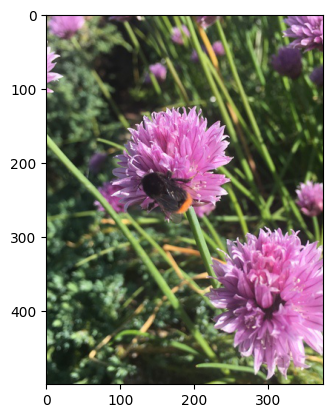

In [32]:
from matplotlib import pyplot


test_img = get_img(fail_cases[3])
pyplot.imshow(test_img)

In [258]:
from myutils import DSS_FULLRES
from myutils.score import getBestIOUfromPreds
from myutils.processors import toBinary, toGreyscale

preds = DSS_FULLRES.segment(test_img)
plt.imshow(toBinary(preds[0], 0))

Using cache found in C:\Users\yitao/.cache\torch\hub\facebookresearch_dino_main


CUDA is available, using GPU.
torch.Size([1, 1025, 2304])
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\yitao\.conda\envs\test\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\yitao\AppData\Local\Temp\ipykernel_26972\908269321.py", line 5, in <module>
    preds = DSS_FULLRES.segment(test_img)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yitao\.conda\envs\test\Lib\site-packages\torch\utils\_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "x:\ResearchProj\myutils\DSS_FULLRES.py", line 215, in segment
    return _segment(inp)
           ^^^^^^^^^^^^^
  File "c:\Users\yitao\.conda\envs\test\Lib\site-packages\torch\utils\_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "x:\ResearchProj\myutils\DSS_FULLRES.py", line 138, in segment
    output_qkv = feat_out["qkv"].reshape(B, T, 3, num_heads, -

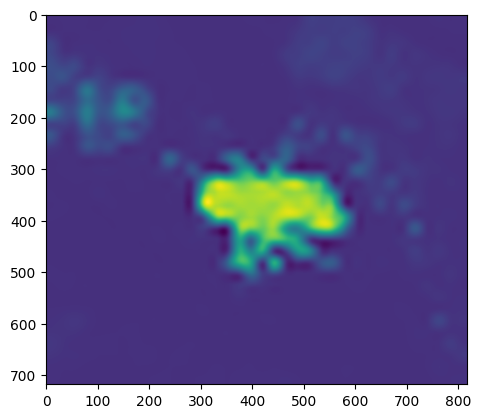

In [261]:
from myutils import DSS

test_img = get_img(699)
preds = DSS.segment(test_img)
plt.imshow(preds[0])

In [247]:
from myutils import DSS
from myutils.score import getBestIOUfromPreds
from myutils.processors import toBinary, toGreyscale

preds = DSS.segment(test_img)
# gt = torch.from_numpy(np.array(get_img(fail_cases[3], _gt=True).convert("1"))).long()
# result = getBestIOUfromPreds(preds, gt)
# pyplot.imshow(toBinary(toGreyscale(preds[result[0]]), result[1][0]))
# print(f"IOU score: {result[1][1]:2f} obtained at t={result[1][0]} in eigenvector {result[0]}")

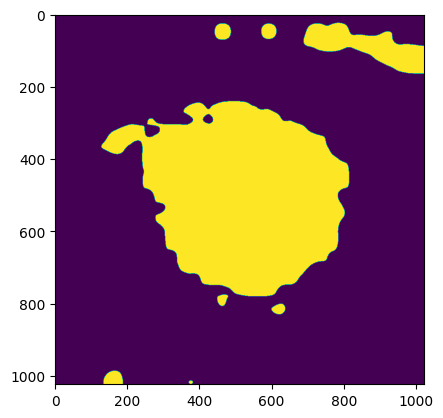

In [251]:
plt.imshow(toBinary(preds[0], 0))

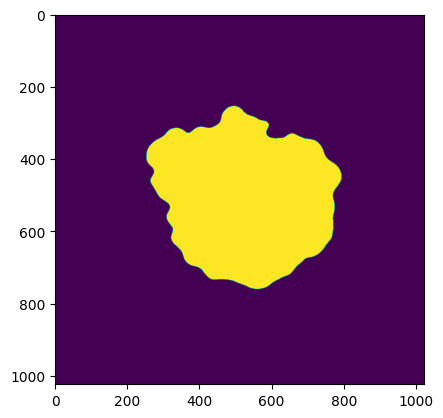

In [252]:
plt.imshow(toBinary(toGreyscale(preds[0]), 0.32))

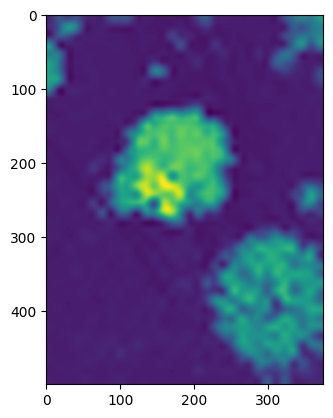

In [47]:
pyplot.imshow(preds[0])

IOU score: 69.726795 obtained at t=0.9 in prompts 0


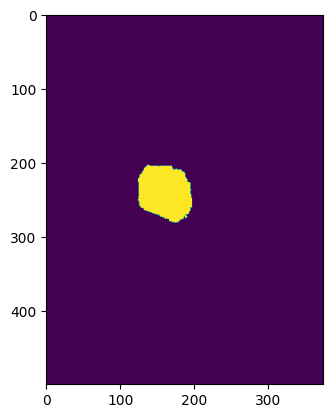

In [62]:
from myutils import CLIPSeg
import torchvision.transforms as transforms

tensor = preds[0].float()
tensor /= tensor.max()

# 创建一个 PIL 图像对象
tensors = torch.stack((preds[0], preds[1], preds[4]), dim=0)
image = transforms.ToPILImage()(tensors)

new_preds = CLIPSeg.segment(image, prompts=["insect shaped", "bees"])
new_result = getBestIOUfromPreds(new_preds, gt)
pyplot.imshow(toBinary(toGreyscale(new_preds[new_result[0]]), new_result[1][0]))
print(f"IOU score: {new_result[1][1]:2f} obtained at t={new_result[1][0]} in prompts {new_result[0]}")

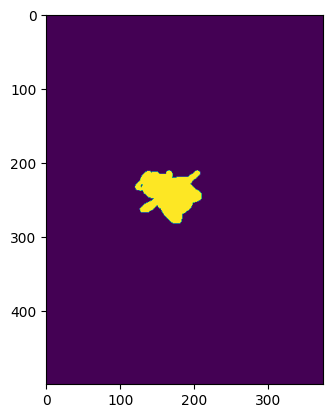

In [43]:
pyplot.imshow(gt)

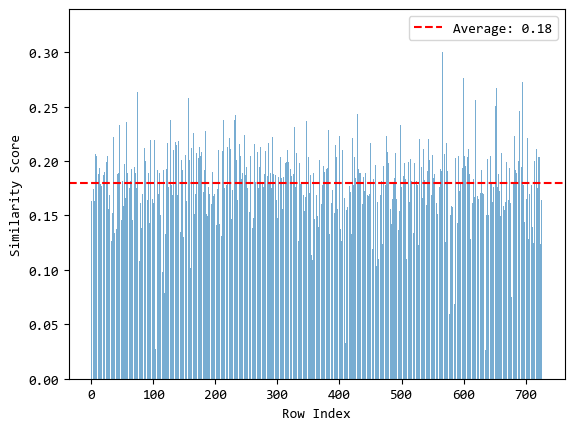

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 similarity_mat 是 axb 的数组
a, b = similarity_mat.shape

# 计算每一行的平均数和方差
row_means = np.mean(similarity_mat, axis=1)
row_std = np.std(similarity_mat, axis=1)

# 横坐标范围 [1, a]
x = np.arange(1, a + 1)

# 绘制柱状图
plt.bar(x, row_means, capsize=5, align="center", alpha=0.6)

# 添加平均数水平线
average_line = np.mean(row_means)
plt.axhline(average_line, color="red", linestyle="--", label=f"Average: {average_line:.2f}")

# 添加标签和图例
plt.xlabel("Row Index")
plt.ylabel("Similarity Score")
plt.legend()

# 显示图
plt.show()

## MIX MODELS

In [18]:
# DSS->CLIPSeg as classifier
from tqdm import tqdm
from myutils.loaders import get_img, get_imgNames
from myutils.MixModel import DSS2CLIPSeg

import numpy as np
import matplotlib.pyplot as plt

img_names = get_imgNames()
# test_img = get_img(2)
# pred = DSS2CLIPSeg(test_img)

preds_arr = np.zeros(len(img_names))
print(preds_arr.shape)

for i in tqdm(range(len(img_names)), desc="getting best idx", ncols=100):
    preds_arr[i] = DSS2CLIPSeg(get_img(i + 1))[0]

(726,)


getting best idx: 100%|███████████████████████████████████████████| 726/726 [13:20<00:00,  1.10s/it]


In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


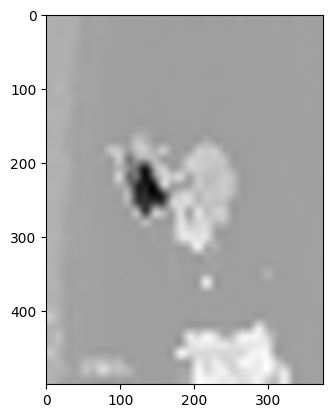

In [45]:
from myutils.MixModel import dssPredstoImage

img = dssPredstoImage(preds)
plt.imshow(img)

In [48]:
_, clipseg = CLIPSeg.get_segment(["insect shaped"])

### Failcases use Combined model to improve

In [7]:
import numpy


fail_cases = numpy.loadtxt("./results/fail_cases_under50.txt", dtype=int)
fail_cases

array([ 10,  76, 104, 158, 168, 192, 210, 248, 359, 453, 508, 519, 607])

### DSSPreds2CLIPSeg

In [68]:
test_case_id = 0
test_img = get_img(fail_cases[test_case_id])
gt = get_img(fail_cases[test_case_id], _gt=True)
dss_pred = DSS.segment(test_img)[0]

from myutils.MixModel import DSSPreds2CLIPSeg
import torch

mix_pred = DSSPreds2CLIPSeg(test_img)[0]
bi_mix_pred = toBinary(toGreyscale(mix_pred, 1), 0.92)

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


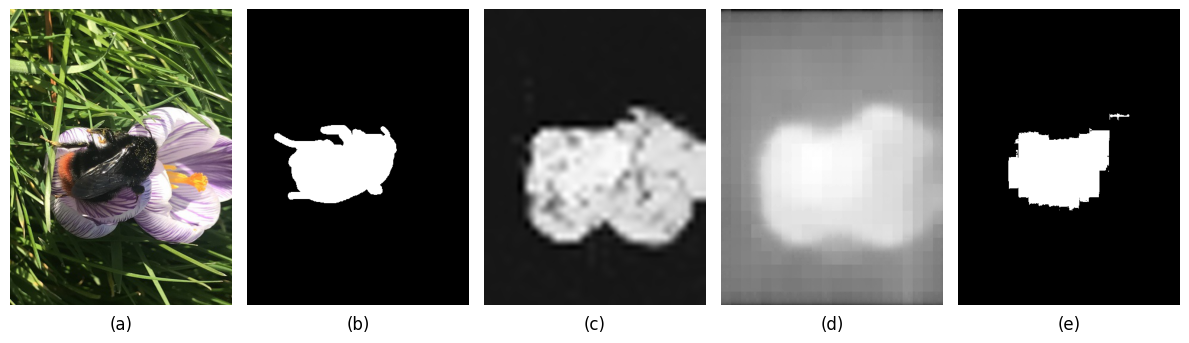

In [67]:
from myutils.showcase import showShowcases

toshow = [test_img, gt, dss_pred, mix_pred, bi_mix_pred]
showShowcases(toshow)

### CLIPSeg2DSS

In [112]:
test_case_id = 0
test_img = get_img(fail_cases[test_case_id])
gt = get_img(fail_cases[test_case_id], _gt=True)
_, clipseg = CLIPSeg.get_segment(["insect shaped"])
clip_pred = clipseg(test_img)[0]
bi_pred = toBinary(toGreyscale(clip_pred), t=0.78)
dss_pred = DSS.segment(test_img)[0]

from myutils.MixModel import getBBoxCords

left, upper, right, lower = getBBoxCords(bi_pred)

cropped_region = test_img.crop((left, upper, right, lower))

pred_dss = DSS.segment(cropped_region)[0]
pred_gs = toGreyscale(pred_dss)
bi_pred_2 = toBinary(pred_gs)

result_tensor = torch.zeros_like(bi_pred)
result_tensor[upper:lower, left:right] = bi_pred_2

c:\Users\yitao\.conda\envs\test\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


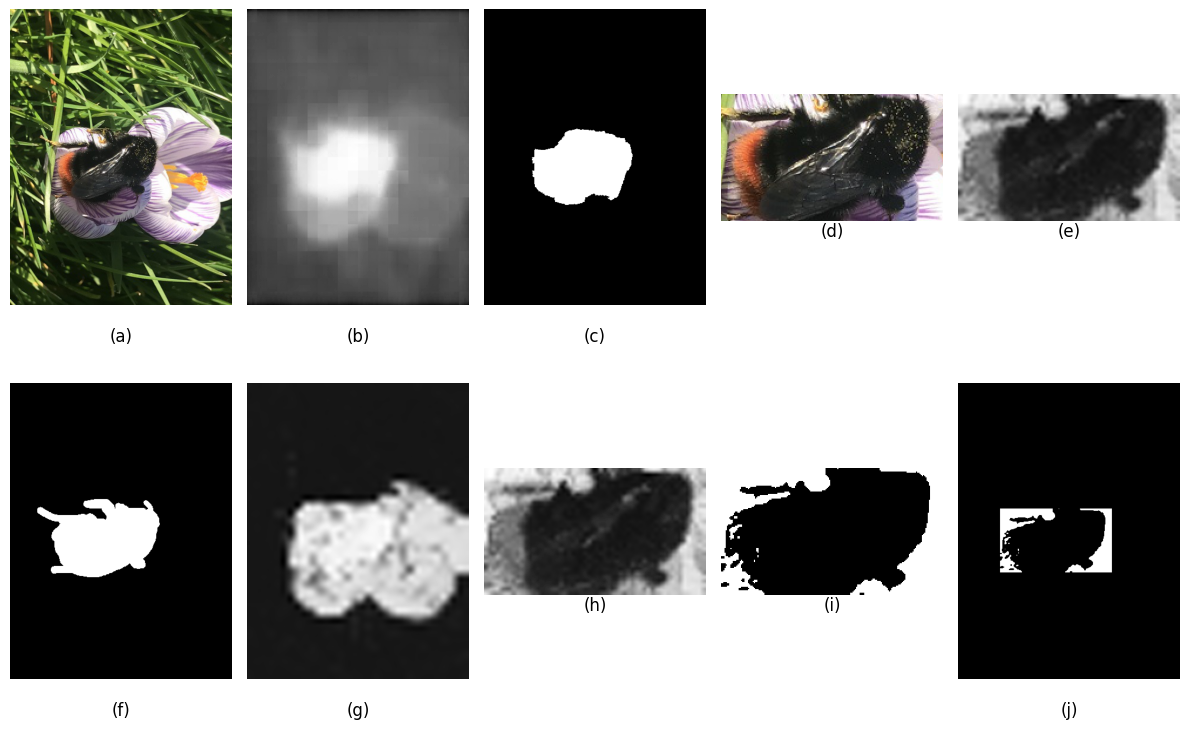

In [114]:
from myutils.showcase import showShowcases

showShowcases([test_img, clip_pred, bi_pred, cropped_region, 
               pred_dss, gt, dss_pred, pred_gs, bi_pred_2, result_tensor], 2)

In [140]:
test_case_id = 0
test_img = get_img(fail_cases[test_case_id])
gt = get_img(fail_cases[test_case_id], _gt=True)
_, clipseg = CLIPSeg.get_segment(["insect shaped"])
clip_pred = clipseg(test_img)[0]
bi_pred = toBinary(toGreyscale(clip_pred), t=0.78)
dss_pred = DSS.segment(test_img)[0]

from myutils.MixModel import getBBoxCords

left, upper, right, lower = getBBoxCords(bi_pred)

cropped_region = test_img.crop((left, upper, right, lower))

pred_dss = DSS.segment(cropped_region)[0]
pred_gs = toGreyscale(pred_dss)
bi_pred_2 = toBinary(pred_gs, mode=2)[1]

result_tensor = torch.zeros_like(bi_pred)
result_tensor[upper:lower, left:right] = bi_pred_2

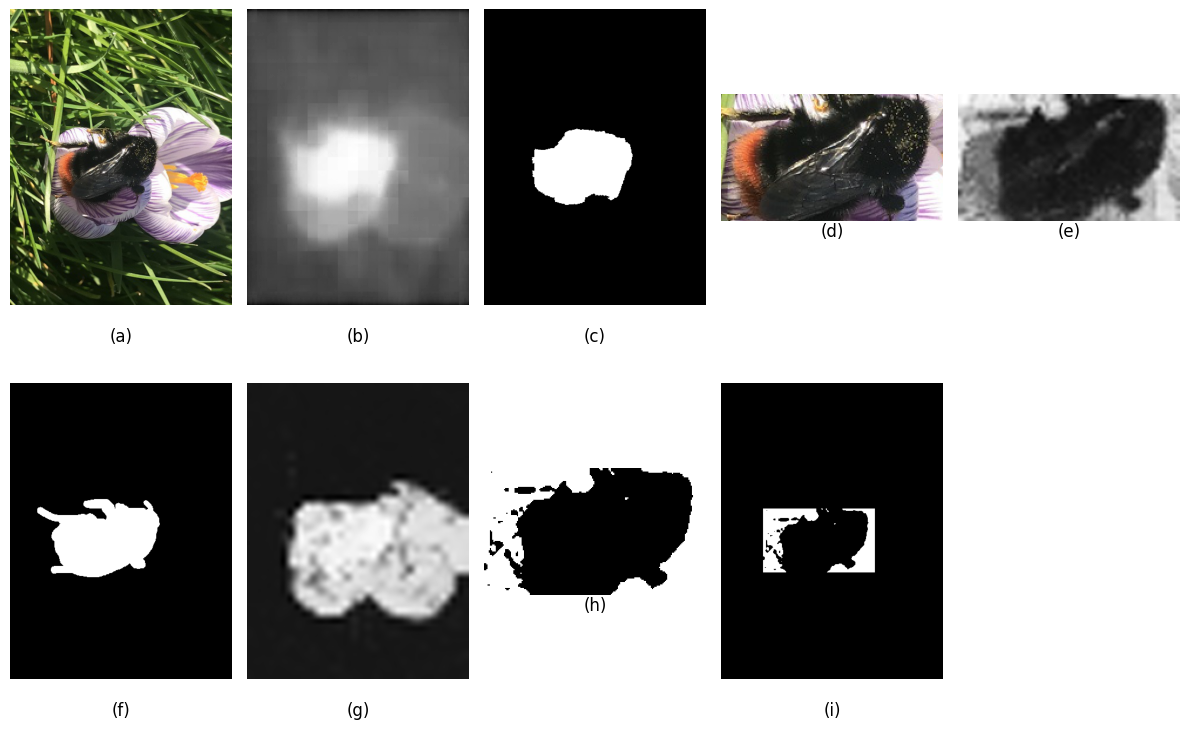

In [141]:
from myutils.showcase import showShowcases

showShowcases([test_img, clip_pred, bi_pred, cropped_region, pred_dss,
                gt, dss_pred, bi_pred_2, result_tensor], 2)

In [129]:
sp_showcases = []

In [142]:
sp_showcases.append(dss_pred)
sp_showcases.append(cropped_region)
sp_showcases.append(pred_dss)

In [143]:
len(sp_showcases)

12

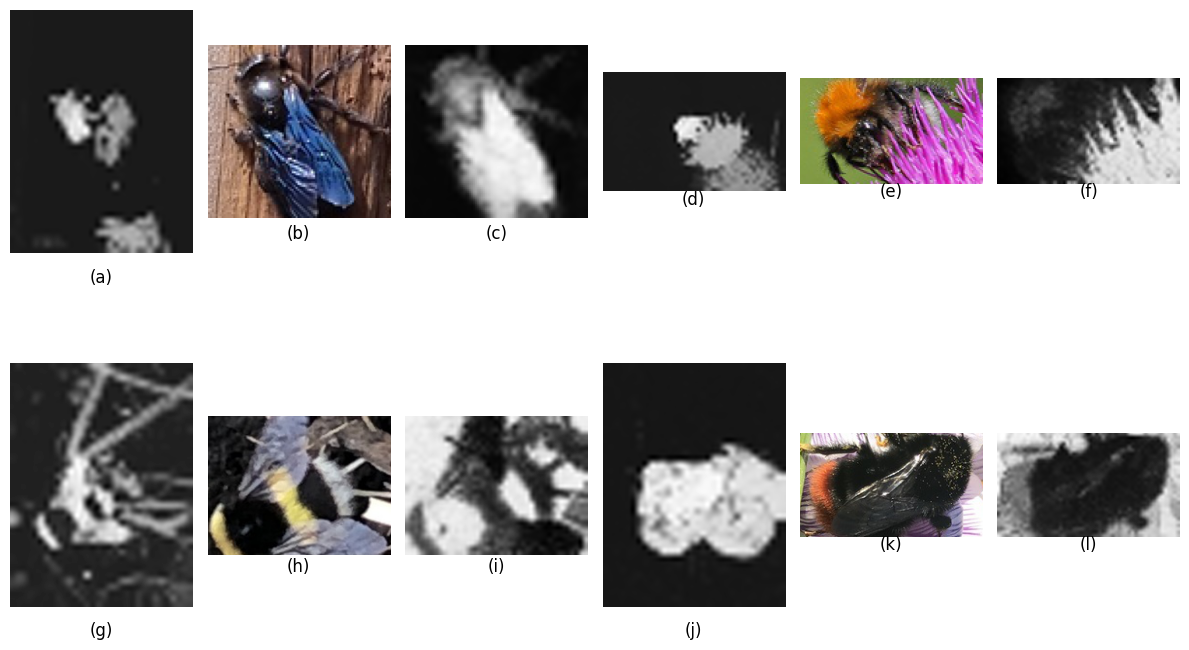

In [146]:
showShowcases(sp_showcases, 2)